In [1]:
import numpy as np
import pandas as pd  # import pandas
import matplotlib.pyplot as plt
import seaborn as sns   # import seaborn for visualisastion
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import t
from scipy.stats import wilcoxon
from scipy.stats import ranksums
from scipy import stats
from statistics import mean
from statistics import median
from scipy.stats import sem
import pingouin as pt
import easygui
import itertools
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df = easygui.fileopenbox(title="Select a file", filetypes= None)
df = pd.read_excel(df)

In [3]:
df.head(20)

,kohorta,szczur,grupa,Time in CPP_pre,Time in laser_on [s]_pre,Time in laser_on [%]_pre,Mean time in laser_on [s]_pre,Min time in laser_on [s]_pre,Max time in laser_on [s]_pre,Median time in laser_on [s]_pre,...,Episode of total mobile_post,Episode of total immobile_post,Episode of mobile in laser_on_post,Episode of immobile in laser_on_post,Episode of mobile in laser_off_post,Episode of immobile in laser_off_post,Total velocity_post,Total velocity in mob_post,Mob velocity in laser_on_post,Mob velocity in laser_off_post
0,a,7,e,940.300000,455,46.00,32,6,68,32,...,164,163,88,83,70,63,7.67,18.03,17.15,17.57
1,a,11,e,927.166667,324,35.03,17,7,55,12,...,60,61,25,25,24,23,2.93,14.30,13.47,14.88
2,a,12,e,917.000000,488,53.80,41,8,110,27,...,100,101,38,37,54,58,4.64,14.57,13.85,13.87
3,c,1,e,896.000000,312,34.90,24,9,46,18,...,87,88,38,39,42,46,4.41,14.31,14.49,13.85
4,c,2,c,955.000000,378,39.71,16,7,33,13,...,177,178,74,73,82,72,6.94,17.03,17.13,16.32
5,c,3,c,942.000000,342,36.38,24,10,43,21,...,149,150,55,54,82,84,4.52,15.10,15.06,15.28
6,c,4,e,931.000000,463,49.78,66,12,191,44,...,78,79,30,39,41,68,3.63,12.26,12.09,11.82
7,d,3,e,932.000000,347,37.31,35,10,88,25,...,50,51,16,24,19,29,2.73,12.52,10.95,11.16
8,d,6,c,924.000000,382,43.43,35,15,79,32,...,91,92,40,36,42,44,4.25,13.77,12.74,12.93
9,d,7,e,920.000000,568,61.87,71,22,204,51,...,54,55,23,30,29,49,3.87,14.79,13.30,14.04


In [4]:
column_list_all = df.columns.tolist()
stim_at_each_day = [x for x in column_list_all if "Stim" in x]
column_list = column_list_all[3:]
column_list = [x for x in column_list if x not in stim_at_each_day]

In [5]:
column_list

['Time in CPP_pre',
 'Time in laser_on [s]_pre',
 'Time in laser_on [%]_pre',
 'Mean time in laser_on [s]_pre',
 'Min time in laser_on [s]_pre',
 'Max time in laser_on [s]_pre',
 'Median time in laser_on [s]_pre',
 'Time in laser_off [s]_pre',
 'Time in laser_off [%]_pre',
 'Mean time in laser_off [s]_pre',
 'Min time in laser_off [s]_pre',
 'Max time in laser_off [s]_pre',
 'Median time in laser_off [s]_pre',
 'Time in C [s]_pre',
 'Time in C [%]_pre',
 'Entrance to laser_on_pre',
 'Entrance to laser_off_pre',
 'Total distance [cm]_pre',
 'Total distance in laser_on[cm]_pre',
 'Total distance in laser_off [cm]_pre',
 'Episode of total mobile_pre',
 'Episode of total immobile_pre',
 'Episode of mobile in laser_on_pre',
 'Episode of immobile in laser_on_pre',
 'Episode of mobile in laser_off_pre',
 'Episode of immobile in laser_off_pre',
 'Total velocity_pre',
 'Total velocity in mob_pre',
 'Mob velocity in laser_on_pre',
 'Mob velocity in laser_off_pre',
 'Time in CPP_con1',
 'Time in 

In [6]:
number_of_features = int(len(column_list)/4)

In [7]:
each_day = [x for x in range(0, len(column_list),number_of_features)]
print(each_day)

[0, 30, 60, 90]


In [8]:
check_noramlity = pd.DataFrame(columns = ["W", "p-value", "normal", "feature", "group"])
n = 0

for i in column_list:
    ctrl_group = pt.normality(df.loc[df["grupa"] == "c", i]).values.tolist()
    ctrl_group = list(itertools.chain(*ctrl_group))
    ctrl_group.append(i)
    ctrl_group.append("c")
    
    exp_group = pt.normality(df.loc[df["grupa"] == "e", i]).values.tolist()
    exp_group = list(itertools.chain(*exp_group))
    exp_group.append(i)
    exp_group.append("e")
    
    check_noramlity.loc[n] = exp_group
    check_noramlity.loc[n+1] = ctrl_group
    n +=2

In [9]:
check_noramlity[180:240]

,W,p-value,normal,feature,group
180,0.889654,0.232301,True,Time in CPP_post,e
181,0.630747,0.000363,False,Time in CPP_post,c
182,0.975444,0.936967,True,Time in laser_on [s]_post,e
183,0.886065,0.215006,True,Time in laser_on [s]_post,c
184,0.987972,0.991309,True,Time in laser_on [%]_post,e
185,0.923874,0.462083,True,Time in laser_on [%]_post,c
186,0.938334,0.594769,True,Mean time in laser_on [s]_post,e
187,0.972049,0.913584,True,Mean time in laser_on [s]_post,c
188,0.953881,0.750217,True,Min time in laser_on [s]_post,e
189,0.766393,0.012376,False,Min time in laser_on [s]_post,c


#### CPP Time  

In [45]:
#laser on
columns_of_feature = [x for x in column_list if "Time in laser_on [%]" in x]
columns_of_feature
#laser off
columns_of_feature_off = [x for x in column_list if "Time in laser_off [%]" in x]
columns_of_feature_off

['Time in laser_off [%]_pre',
 'Time in laser_off [%]_con1',
 'Time in laser_off [%]_con2',
 'Time in laser_off [%]_post']

In [46]:
exp_time = [df.loc[df["grupa"] == "e", x].tolist() for x in columns_of_feature]
exp_time_mean = [mean(x) for x in exp_time]
exp_time_sem = [sem(x) for x in exp_time]

exp_time_off = [df.loc[df["grupa"] == "e", x].tolist() for x in columns_of_feature_off]
exp_time_off_mean = [mean(x) for x in exp_time_off]
exp_time_off_sem = [sem(x) for x in exp_time_off]

control_time = [df.loc[df["grupa"] == "c", x].tolist() for x in columns_of_feature]
control_time_mean = [mean(x) for x in control_time]
control_time_sem = [sem(x) for x in control_time]

control_time_off = [df.loc[df["grupa"] == "c", x].tolist() for x in columns_of_feature_off]
control_time_off_mean = [mean(x) for x in control_time_off]
control_time_off_sem = [sem(x) for x in control_time_off]

flat_list_exp = list(np.concatenate(exp_time).flat)
flat_list_control = list(np.concatenate(control_time).flat)
day_feature = list(np.repeat(columns_of_feature, 8))
subject_exp =  list(np.repeat(np.arange(1,9), 4))
subject_exp = list(np.arange(1,9))  + list(np.arange(1,9)) + list(np.arange(1,9)) + list(np.arange(1,9))
subject_control = list(np.arange(9,17))  + list(np.arange(9,17)) + list(np.arange(9,17)) + list(np.arange(9,17))
day_feature = day_feature + day_feature 
group_feature = list(np.repeat(["e", "c"], 32))
time_feature = flat_list_exp + flat_list_control
subject_feature = subject_exp + subject_control

In [30]:
exp_time_off_sem

[2.3932179099040924, 4.809527166208753, 5.309866069739558, 3.8124542151817558]

In [47]:
# ANOVA

dv_anova = pd.DataFrame(columns = ["time", "group", "day", "subject"])
dv_anova["time"] = time_feature
dv_anova["group"] = group_feature
dv_anova["day"] = day_feature
dv_anova["subject"] = subject_feature
pt.mixed_anova(data=dv_anova, dv="time", between="group", within="day", subject='subject')
#posthocs = pt.pairwise_tukey(dv='time',
                              #between=("group", "day"),  data=dv_anova)
#posthocs

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,group,2072.867077,1,14,2072.867077,15.125796,0.001636,0.519326,NaN
1,day,1508.497930,3,42,502.832643,6.312628,0.001240,0.310774,0.814163
2,Interaction,1351.038092,3,42,450.346031,5.653704,0.002397,0.287666,NaN


In [13]:
dv_anova.loc[(dv_anova["group"] == "e") & (dv_anova["day"] == "Time in laser_on [%]_post"), "time"].sem()

2.4045870877346065

C:\Users\gniew\AppData\Local\Temp\ipykernel_35368\404351380.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


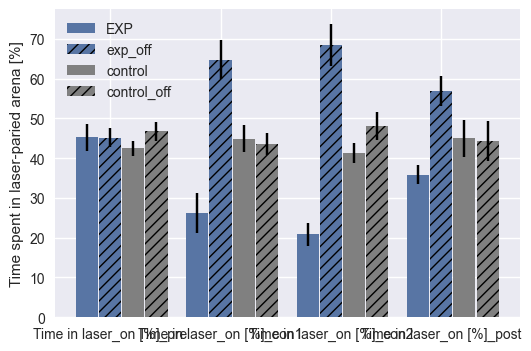

In [14]:
#  Graph
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(6,4))
x = np.arange(4)
width = 0.2
ax.bar(x - (width + 0.01), exp_time_mean, width, color="#5875a4", yerr = exp_time_sem)
ax.bar(x, exp_time_off_mean, width, color="#5875a4", yerr = exp_time_off_sem, hatch='///')
ax.bar(x+ (width + 0.01), control_time_mean, width, color='#808080', yerr = control_time_sem)
ax.bar(x + 2*(width + 0.01), control_time_off_mean, width, color='#808080', yerr = control_time_off_sem, hatch='///')

plt.xticks(x, columns_of_feature)
ax.set_ylabel("Time spent in laser-paried arena [%]")
ax.legend(["EXP", "exp_off", "control", "control_off"])
save_fig_to = "C:/Users/gniew/Desktop/PRACA/doktorat/behawior/CPP_A/time_[%].svg"
plt.savefig(save_fig_to)
plt.show()

#### CPP Distance

In [31]:
columns_of_feature =  [x for x in column_list if "Total distance in laser_on[cm]" in x]
columns_of_feature
columns_of_feature_off = [x for x in column_list if "Total distance in laser_off [cm]" in x]
columns_of_feature_off

['Total distance in laser_off [cm]_pre',
 'Total distance in laser_off [cm]_con1',
 'Total distance in laser_off [cm]_con2',
 'Total distance in laser_off [cm]_post']

In [32]:
exp_dist = [df.loc[df["grupa"] == "e", x].tolist() for x in columns_of_feature]
exp_dist_mean = [mean(x) for x in exp_dist]
exp_dist_sem = [sem(x) for x in exp_dist]

exp_dist_off = [df.loc[df["grupa"] == "e", x].tolist() for x in columns_of_feature_off]
exp_dist_off_mean = [mean(x) for x in exp_dist_off]
exp_dist_off_sem = [sem(x) for x in exp_dist_off]

control_dist = [df.loc[df["grupa"] == "c", x].tolist() for x in columns_of_feature]
control_dist_mean = [mean(x) for x in control_dist]
control_dist_sem = [sem(x) for x in control_dist]

control_dist_off = [df.loc[df["grupa"] == "c", x].tolist() for x in columns_of_feature_off]
control_dist_off_mean = [mean(x) for x in control_dist_off]
control_dist_off_sem = [sem(x) for x in control_dist_off]


flat_list_exp_dist = list(np.concatenate(exp_dist).flat)
flat_list_control_dist = list(np.concatenate(control_dist).flat)
dist_feature = flat_list_exp_dist + flat_list_control_dist

In [36]:
exp_dist_off_sem

[141.61220848487704, 138.10221460980966, 257.4688134287196, 143.51126506228277]

In [91]:
for i in control_dist_off:
    print("KK")
    for j in i:
        print(j)

KK
2513.23
1710.18
1727.4
1491.27
1503.14
2375.13
1882.66
1459.71
KK
4731.37
3081.7
1959.68
4095.05
3036.34
3690.27
2623.16
2264.38
KK
3691.31
3218.04
2048.86
3190.08
3742.73
3905.25
2440.63
2757.85
KK
2301.98
2328.58
1453.82
1293.7
1486.37
1134.81
1187.18
1477.63


In [18]:
dv_anova["distance"] = dist_feature
dv_anova

,time,group,day,subject,distance
0,46.00,e,Time in laser_on [%]_pre,1,2481.301
1,35.03,e,Time in laser_on [%]_pre,2,1477.743
2,53.80,e,Time in laser_on [%]_pre,3,2577.680
3,34.90,e,Time in laser_on [%]_pre,4,1602.120
4,49.78,e,Time in laser_on [%]_pre,5,1627.820
...,...,...,...,...,...
59,57.11,c,Time in laser_on [%]_post,12,2042.840
60,49.50,c,Time in laser_on [%]_post,13,1860.780
61,67.77,c,Time in laser_on [%]_post,14,2569.670
62,37.44,c,Time in laser_on [%]_post,15,970.870


In [19]:
pt.mixed_anova(data=dv_anova, dv="distance", between="group", within="day", subject='subject')
posthocs = pt.pairwise_tests(dv='distance', within="day", subject='subject',
                              between="group",  data=dv_anova)
posthocs

C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\pingouin\parametric.py:1568: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  aov = pd.concat([aov_betw.drop(1), aov_with.drop(1)], axis=0, sort=False, ignore_index=True)
C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\pingouin\pairwise.py:478: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = data.groupby([subject, f], as_index=False, observed=True, sort=True).mean()


,Contrast,day,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,day,-,Time in laser_on [%]_con1,Time in laser_on [%]_con2,True,True,3.323402,15.0,two-sided,0.004631,10.381,0.431705
1,day,-,Time in laser_on [%]_con1,Time in laser_on [%]_post,True,True,5.419290,15.0,two-sided,0.000071,385.684,1.176940
2,day,-,Time in laser_on [%]_con1,Time in laser_on [%]_pre,True,True,3.617671,15.0,two-sided,0.002532,17.284,1.041197
3,day,-,Time in laser_on [%]_con2,Time in laser_on [%]_post,True,True,3.786981,15.0,two-sided,0.001790,23.22,0.758502
4,day,-,Time in laser_on [%]_con2,Time in laser_on [%]_pre,True,True,2.321605,15.0,two-sided,0.034741,1.998,0.579433
5,day,-,Time in laser_on [%]_post,Time in laser_on [%]_pre,True,True,-1.531221,15.0,two-sided,0.146530,0.675,-0.337559
6,group,-,c,e,False,True,1.802349,14.0,two-sided,0.093055,1.194,0.852020
7,day * group,Time in laser_on [%]_con1,c,e,False,True,2.525069,14.0,two-sided,0.024261,2.819,1.193669
8,day * group,Time in laser_on [%]_con2,c,e,False,True,2.122410,14.0,two-sided,0.052123,1.708,1.003321
9,day * group,Time in laser_on [%]_post,c,e,False,True,0.991816,14.0,two-sided,0.338121,0.594,0.468859


In [20]:
dv_anova.loc[(dv_anova["group"] == "e") & (dv_anova["day"] == "Time in laser_on [%]_post"), "distance"].sem()

236.43905954840437

C:\Users\gniew\AppData\Local\Temp\ipykernel_35368\1257252834.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


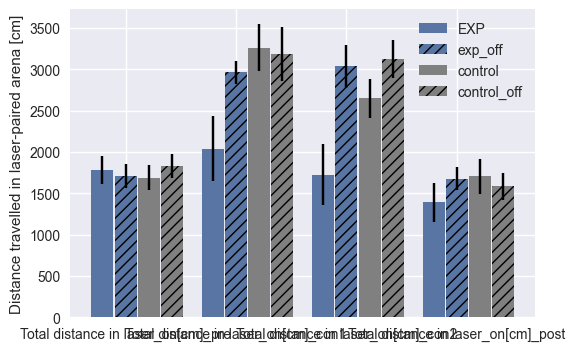

In [21]:
#  Graph
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(6,4))
x = np.arange(4)
width = 0.2
ax.bar(x - (width + 0.01), exp_dist_mean, width, color="#5875a4", yerr = exp_dist_sem)
ax.bar(x, exp_dist_off_mean, width, color="#5875a4", yerr = exp_dist_off_sem, hatch='///')
ax.bar(x+ (width + 0.01), control_dist_mean, width, color='#808080', yerr = control_dist_sem)
ax.bar(x + 2*(width + 0.01), control_dist_off_mean, width, color='#808080', yerr = control_dist_off_sem, hatch='///')

plt.xticks(x, columns_of_feature)
ax.set_ylabel("Distance travelled in laser-paired arena [cm]")
ax.legend(["EXP", "exp_off", "control", "control_off"])
save_fig_to = "C:/Users/gniew/Desktop/PRACA/doktorat/behawior/CPP_A/distaince_[cm].svg"
plt.savefig(save_fig_to)
plt.show()

#### Velocity 

In [22]:
columns_of_feature =  [x for x in column_list if "Mob velocity in laser_on_" in x]
columns_of_feature
columns_of_feature_off =  [x for x in column_list if "Mob velocity in laser_off" in x]
columns_of_feature_off

['Mob velocity in laser_off_pre',
 'Mob velocity in laser_off_con1',
 'Mob velocity in laser_off_con2',
 'Mob velocity in laser_off_post']

In [23]:
exp_velocity = [df.loc[df["grupa"] == "e", x].tolist() for x in columns_of_feature]
exp_velocity_mean = [mean(x) for x in exp_velocity]
exp_velocity_sem = [sem(x) for x in exp_velocity]
control_velocity = [df.loc[df["grupa"] == "c", x].tolist() for x in columns_of_feature]
control_velocity_mean = [mean(x) for x in control_velocity]
control_velocity_sem = [sem(x) for x in control_velocity]

exp_velocity_off = [df.loc[df["grupa"] == "e", x].tolist() for x in columns_of_feature_off]
exp_velocity_off_mean = [mean(x) for x in exp_velocity_off]
exp_velocity_off_sem = [sem(x) for x in exp_velocity_off]

control_velocity_off = [df.loc[df["grupa"] == "c", x].tolist() for x in columns_of_feature_off]
control_velocity_off_mean = [mean(x) for x in control_velocity_off]
control_velocity_off_sem = [sem(x) for x in control_velocity_off]

flat_list_exp_velocity = list(np.concatenate(exp_velocity).flat)
flat_list_control_velocity = list(np.concatenate(control_velocity).flat)
velocity_feature = flat_list_exp_velocity + flat_list_control_velocity
dv_anova["velocity"] = velocity_feature

In [24]:
pt.mixed_anova(data=dv_anova, dv="velocity", between="group", within="day", subject='subject')

#pt.pairwise_tukey(data=dv_anova, dv="velocity", between= "day")

C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\pingouin\parametric.py:1568: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  aov = pd.concat([aov_betw.drop(1), aov_with.drop(1)], axis=0, sort=False, ignore_index=True)


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,group,3.812256,1,14,3.812256,0.398235,0.538169,NaN,0.027659,NaN,NaN,NaN,NaN
1,day,11.789406,3,42,3.929802,3.696201,0.018961,0.048423,0.208870,0.607446,False,0.397337,0.027106
2,Interaction,5.965431,3,42,1.988477,1.870275,0.149307,NaN,0.117848,NaN,NaN,NaN,NaN


C:\Users\gniew\AppData\Local\Temp\ipykernel_35368\4158745283.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


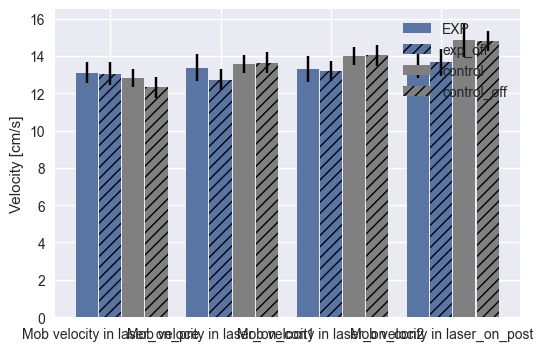

In [25]:
#  Graph
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(6,4))
x = np.arange(4)
width = 0.2
ax.bar(x - (width + 0.01), exp_velocity_mean, width, color="#5875a4", yerr = exp_velocity_sem)
ax.bar(x, exp_velocity_off_mean, width, color="#5875a4", yerr = exp_velocity_off_sem, hatch='///')
ax.bar(x+ (width + 0.01), control_velocity_mean, width, color='#808080', yerr = control_velocity_sem)
ax.bar(x + 2*(width + 0.01), control_velocity_off_mean, width, color='#808080', yerr = control_velocity_off_sem, hatch='///')

plt.xticks(x, columns_of_feature)
ax.set_ylabel("Velocity [cm/s]")
ax.legend(["EXP", "exp_off", "control", "control_off"])
save_fig_to = "C:/Users/gniew/Desktop/PRACA/doktorat/behawior/CPP_A/Velocity_.svg"
plt.savefig(save_fig_to)
plt.show()

In [30]:
for i in control_velocity_off:
    print("KK")
    for j in i:
        print(j)

KK
13.71
12.14
11.55
12.37
11.21
15.45
11.01
11.06
KK
15.46
14.09
12.93
12.59
14.78
15.67
11.85
11.64
KK
13.79
15.23
12.39
14.32
15.01
16.21
11.38
13.87
KK
16.32
15.28
12.93
15.25
16.45
15.45
12.32
14.2


#### CPP Episode of immobile

In [72]:
columns_of_feature =  [x for x in column_list if "Episode of immobile in laser_on" in x]
columns_of_feature_time = [x for x in column_list if "Time in laser_on [s]" in x]
columns_of_feature_time_off = [x for x in column_list if "Time in laser_off [s]" in x]
columns_of_feature_time_off

['Time in laser_off [s]_pre',
 'Time in laser_off [s]_con1',
 'Time in laser_off [s]_con2',
 'Time in laser_off [s]_post']

In [73]:
exp_episode_of_immobile = [df.loc[df["grupa"] == "e", x].tolist() for x in columns_of_feature]
exp_episode_of_immobile_mean = [mean(x) for x in exp_episode_of_immobile]
exp_episode_of_immobile_sem = [sem(x) for x in exp_episode_of_immobile]
control_episode_of_immobile = [df.loc[df["grupa"] == "c", x].tolist() for x in columns_of_feature]
control_episode_of_immobile_mean = [mean(x) for x in control_episode_of_immobile]
control_episode_of_immobile_sem = [sem(x) for x in control_episode_of_immobile]

flat_list_exp_episode_of_immobile = list(np.concatenate(exp_episode_of_immobile).flat)
flat_list_control_episode_of_immobile = list(np.concatenate(control_episode_of_immobile).flat)
episode_of_immobile_feature = flat_list_exp_episode_of_immobile + flat_list_control_episode_of_immobile
dv_anova["Episode_of_immobile"] = episode_of_immobile_feature

In [74]:
pt.mixed_anova(data=dv_anova, dv="Episode_of_immobile", between="group", within="day", subject='subject')

C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\pingouin\parametric.py:1568: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  aov = pd.concat([aov_betw.drop(1), aov_with.drop(1)], axis=0, sort=False, ignore_index=True)


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,group,5757.015625,1,14,5757.015625,2.798249,0.116556,NaN,0.166580,NaN,NaN,NaN,NaN
1,day,7262.171875,3,42,2420.723958,12.777430,0.000005,0.000679,0.477172,0.652562,False,0.40928,0.031827
2,Interaction,3432.546875,3,42,1144.182292,6.039395,0.001626,NaN,0.301376,NaN,NaN,NaN,NaN


In [75]:
pt.pairwise_tests(dv='Episode_of_immobile', within="day", subject='subject',
                              between="group",  data=dv_anova)

C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\pingouin\pairwise.py:478: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = data.groupby([subject, f], as_index=False, observed=True, sort=True).mean()


,Contrast,day,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,day,-,Time in laser_on [%]_con1,Time in laser_on [%]_con2,True,True,2.895943,15.0,two-sided,0.011086,5.024,0.344067
1,day,-,Time in laser_on [%]_con1,Time in laser_on [%]_post,True,True,4.893174,15.0,two-sided,0.000195,158.544,0.866502
2,day,-,Time in laser_on [%]_con1,Time in laser_on [%]_pre,True,True,3.026572,15.0,two-sided,0.008500,6.256,0.773229
3,day,-,Time in laser_on [%]_con2,Time in laser_on [%]_post,True,True,3.043306,15.0,two-sided,0.008215,6.435,0.584967
4,day,-,Time in laser_on [%]_con2,Time in laser_on [%]_pre,True,True,1.981238,15.0,two-sided,0.066202,1.212,0.462460
5,day,-,Time in laser_on [%]_post,Time in laser_on [%]_pre,True,True,-0.840647,15.0,two-sided,0.413746,0.348,-0.192438
6,group,-,c,e,False,True,1.672797,14.0,two-sided,0.116556,1.045,0.790777
7,day * group,Time in laser_on [%]_con1,c,e,False,True,2.103541,14.0,two-sided,0.053978,1.67,0.994401
8,day * group,Time in laser_on [%]_con2,c,e,False,True,2.345474,14.0,two-sided,0.034258,2.241,1.108770
9,day * group,Time in laser_on [%]_post,c,e,False,True,1.154599,14.0,two-sided,0.267583,0.664,0.545811


C:\Users\gniew\AppData\Local\Temp\ipykernel_6972\2094068029.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


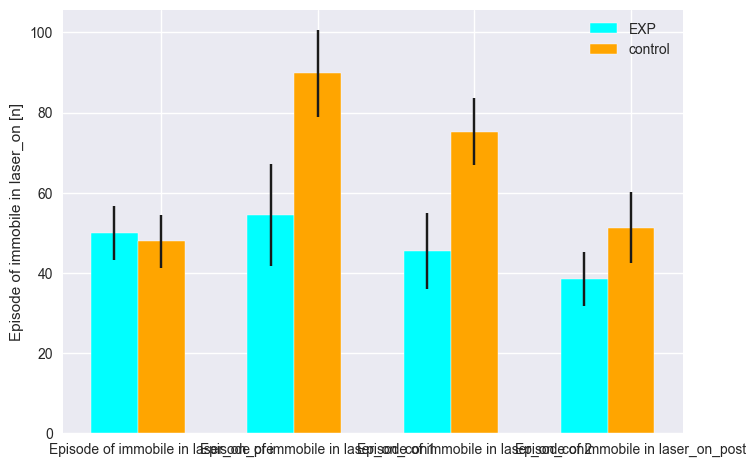

In [76]:
#  Graph
plt.style.use("seaborn")
x = np.arange(4)
width = 0.3
plt.bar(x -0.3, exp_episode_of_immobile_mean, width, color='cyan', yerr = exp_episode_of_immobile_sem)
plt.bar(x, control_episode_of_immobile_mean, width, color='orange', yerr = control_episode_of_immobile_sem)

plt.xticks(x, columns_of_feature)
plt.ylabel("Episode of immobile in laser_on [n]")
plt.legend(["EXP", "control"])
save_fig_to = "C:/Users/gniew/Desktop/PRACA/doktorat/behawior/CPP_A/Episode_of_immobile.svg"
plt.savefig(save_fig_to)
plt.show()

#### CPP Episode of immobile normalized 

In [77]:
exp_time_s = [np.array(df.loc[df["grupa"] == "e", x]) for x in columns_of_feature_time]
exp_episode_of_immobile_norm = [np.array(x) * 60 for x in exp_episode_of_immobile]
exp_episode_of_immobile_norm = [(a/b).tolist() for a,b in zip(exp_episode_of_immobile_norm,exp_time_s)] 
exp_episode_of_immobile_mean_norm = [mean(x) for x in exp_episode_of_immobile_norm]
exp_episode_of_immobile_sem_norm = [sem(x) for x in exp_episode_of_immobile_norm]

control_time_s = [np.array(df.loc[df["grupa"] == "c", x]) for x in columns_of_feature_time]
control_episode_of_immobile_norm = [np.array(x) * 60 for x in control_episode_of_immobile]
control_episode_of_immobile_norm = [(a/b).tolist() for a,b in zip(control_episode_of_immobile_norm,control_time_s)] 
control_episode_of_immobile_mean_norm = [mean(x) for x in control_episode_of_immobile_norm]
control_episode_of_immobile_sem_norm = [sem(x) for x in control_episode_of_immobile_norm]

flat_list_exp_episode_of_immobile_norm = list(np.concatenate(exp_episode_of_immobile_norm).flat)
flat_list_control_episode_of_immobile_norm = list(np.concatenate(control_episode_of_immobile_norm).flat)
episode_of_immobile_feature_norm = flat_list_exp_episode_of_immobile_norm + flat_list_control_episode_of_immobile_norm
dv_anova["Episode_of_immobile_norm"] = episode_of_immobile_feature_norm

C:\Users\gniew\AppData\Local\Temp\ipykernel_6972\1321663998.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


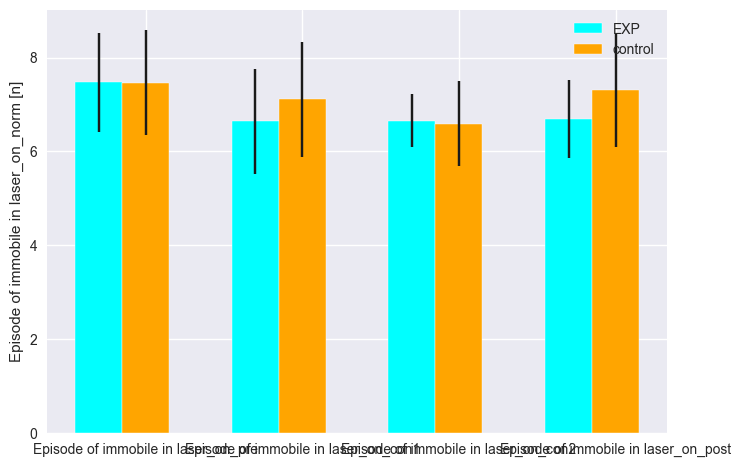

In [78]:
#  Graph
plt.style.use("seaborn")
x = np.arange(4)
width = 0.3
plt.bar(x -0.3, exp_episode_of_immobile_mean_norm, width, color='cyan', yerr = exp_episode_of_immobile_sem_norm)
plt.bar(x, control_episode_of_immobile_mean_norm, width, color='orange', yerr = control_episode_of_immobile_sem_norm)

plt.xticks(x, columns_of_feature)
plt.ylabel("Episode of immobile in laser_on_norm [n]")
plt.legend(["EXP", "control"])
save_fig_to = "C:/Users/gniew/Desktop/PRACA/doktorat/behawior/CPP_A/Episode_of_immobile_normalized.svg"
plt.savefig(save_fig_to)
plt.show()

In [79]:
pt.mixed_anova(data=dv_anova, dv="Episode_of_immobile_norm", between="group", within="day", subject='subject')

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,group,1.020347,1,14,1.020347,0.043654,0.837509,0.003108,NaN
1,day,6.033541,3,42,2.011180,0.595745,0.621306,0.040816,0.863343
2,Interaction,1.381221,3,42,0.460407,0.136380,0.937762,0.009647,NaN


#### CPP Episode of mobile

In [80]:
columns_of_feature =  [x for x in column_list if "Episode of mobile in laser_on" in x]
columns_of_feature
columns_of_feature_off =  [x for x in column_list if "Episode of mobile in laser_off" in x]
columns_of_feature_off

['Episode of mobile in laser_off_pre',
 'Episode of mobile in laser_off_con1',
 'Episode of mobile in laser_off_con2',
 'Episode of mobile in laser_off_post']

In [81]:
exp_episode_of_mobile = [df.loc[df["grupa"] == "e", x].tolist() for x in columns_of_feature]
exp_episode_of_mobile_mean = [mean(x) for x in exp_episode_of_mobile]
exp_episode_of_mobile_sem = [sem(x) for x in exp_episode_of_mobile]

control_episode_of_mobile = [df.loc[df["grupa"] == "c", x].tolist() for x in columns_of_feature]
control_episode_of_mobile_mean = [mean(x) for x in control_episode_of_mobile]
control_episode_of_mobile_sem = [sem(x) for x in control_episode_of_mobile]

exp_episode_of_mobile_off = [df.loc[df["grupa"] == "e", x].tolist() for x in columns_of_feature_off]
exp_episode_of_mobile_off_mean = [mean(x) for x in exp_episode_of_mobile_off]
exp_episode_of_mobile_off_sem = [sem(x) for x in exp_episode_of_mobile_off]

control_episode_of_mobile_off = [df.loc[df["grupa"] == "c", x].tolist() for x in columns_of_feature_off]
control_episode_of_mobile_off_mean = [mean(x) for x in control_episode_of_mobile_off]
control_episode_of_mobile_off_sem = [sem(x) for x in control_episode_of_mobile_off]

flat_list_exp_episode_of_mobile = list(np.concatenate(exp_episode_of_mobile).flat)
flat_list_control_episode_of_mobile = list(np.concatenate(control_episode_of_mobile).flat)
episode_of_mobile_feature = flat_list_exp_episode_of_mobile + flat_list_control_episode_of_mobile
dv_anova["Episode_of_mobile"] = episode_of_mobile_feature

In [82]:
pt.mixed_anova(data=dv_anova, dv="Episode_of_mobile", between="group", within="day", subject='subject')

C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\pingouin\parametric.py:1568: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  aov = pd.concat([aov_betw.drop(1), aov_with.drop(1)], axis=0, sort=False, ignore_index=True)


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,group,5890.5625,1,14,5890.5625,1.973721,0.181852,NaN,0.123561,NaN,NaN,NaN,NaN
1,day,6261.3750,3,42,2087.1250,8.435821,0.000167,0.007411,0.375998,0.569653,False,0.313949,0.007298
2,Interaction,4187.8125,3,42,1395.9375,5.642153,0.002425,NaN,0.287247,NaN,NaN,NaN,NaN


In [83]:
pt.pairwise_tests(dv='Episode_of_mobile', within="day", subject='subject',
                              between="group",  data=dv_anova)

C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\pingouin\pairwise.py:478: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = data.groupby([subject, f], as_index=False, observed=True, sort=True).mean()


,Contrast,day,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,day,-,Time in laser_on [%]_con1,Time in laser_on [%]_con2,True,True,1.925441,15.0,two-sided,0.073348,1.121,0.230042
1,day,-,Time in laser_on [%]_con1,Time in laser_on [%]_post,True,True,3.277548,15.0,two-sided,0.005088,9.593,0.635708
2,day,-,Time in laser_on [%]_con1,Time in laser_on [%]_pre,True,True,2.505857,15.0,two-sided,0.024224,2.662,0.629540
3,day,-,Time in laser_on [%]_con2,Time in laser_on [%]_post,True,True,3.128274,15.0,two-sided,0.006906,7.432,0.489279
4,day,-,Time in laser_on [%]_con2,Time in laser_on [%]_pre,True,True,2.183452,15.0,two-sided,0.045302,1.623,0.480927
5,day,-,Time in laser_on [%]_post,Time in laser_on [%]_pre,True,True,-0.202271,15.0,two-sided,0.842422,0.26,-0.043728
6,group,-,c,e,False,True,1.404892,14.0,two-sided,0.181852,0.813,0.664131
7,day * group,Time in laser_on [%]_con1,c,e,False,True,1.928415,14.0,two-sided,0.074333,1.368,0.911614
8,day * group,Time in laser_on [%]_con2,c,e,False,True,1.701567,14.0,two-sided,0.110929,1.075,0.804377
9,day * group,Time in laser_on [%]_post,c,e,False,True,1.117541,14.0,two-sided,0.282575,0.647,0.528292


C:\Users\gniew\AppData\Local\Temp\ipykernel_6972\2041932418.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


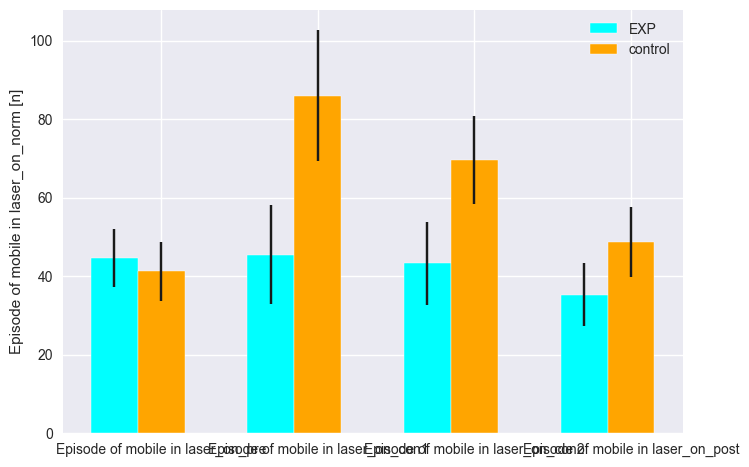

In [84]:
#  Graph
plt.style.use("seaborn")
x = np.arange(4)
width = 0.3
plt.bar(x -0.3, exp_episode_of_mobile_mean, width, color='cyan', yerr = exp_episode_of_mobile_sem)
plt.bar(x, control_episode_of_mobile_mean, width, color='orange', yerr = control_episode_of_mobile_sem)

plt.xticks(x, columns_of_feature)
plt.ylabel("Episode of mobile in laser_on_norm [n]")
plt.legend(["EXP", "control"])
save_fig_to = "C:/Users/gniew/Desktop/PRACA/doktorat/behawior/CPP_A/Episode_of_mmobile.svg"
plt.savefig(save_fig_to)
plt.show()

In [85]:
columns_of_feature_time

['Time in laser_on [s]_pre',
 'Time in laser_on [s]_con1',
 'Time in laser_on [s]_con2',
 'Time in laser_on [s]_post']

#### CPP Episode of mobile normalized 

In [86]:
exp_time_s = [np.array(df.loc[df["grupa"] == "e", x]) for x in columns_of_feature_time]
exp_episode_of_mobile_norm = [np.array(x) * 60 for x in exp_episode_of_mobile]
exp_episode_of_mobile_norm = [(a/b).tolist() for a,b in zip(exp_episode_of_mobile_norm,exp_time_s)] 
exp_episode_of_mobile_mean_norm = [mean(x) for x in exp_episode_of_mobile_norm]
exp_episode_of_mobile_sem_norm = [sem(x) for x in exp_episode_of_mobile_norm]

control_time_s = [np.array(df.loc[df["grupa"] == "c", x]) for x in columns_of_feature_time]
control_episode_of_mobile_norm = [np.array(x) * 60 for x in control_episode_of_mobile]
control_episode_of_mobile_norm = [(a/b).tolist() for a,b in zip(control_episode_of_mobile_norm,control_time_s)] 
control_episode_of_mobile_mean_norm = [mean(x) for x in control_episode_of_mobile_norm]
control_episode_of_mobile_sem_norm = [sem(x) for x in control_episode_of_mobile_norm]

exp_time_s_off = [np.array(df.loc[df["grupa"] == "e", x]) for x in columns_of_feature_time_off]
exp_episode_of_mobile_off_norm = [np.array(x) * 60 for x in exp_episode_of_mobile_off]
exp_episode_of_mobile_off_norm = [(a/b).tolist() for a,b in zip(exp_episode_of_mobile_off_norm,exp_time_s_off)] 
exp_episode_of_mobile_off_mean_norm = [mean(x) for x in exp_episode_of_mobile_off_norm]
exp_episode_of_mobile_off_sem_norm = [sem(x) for x in exp_episode_of_mobile_off_norm]

control_time_s_off = [np.array(df.loc[df["grupa"] == "c", x]) for x in columns_of_feature_time_off]
control_episode_of_mobile_off_norm = [np.array(x) * 60 for x in control_episode_of_mobile_off]
control_episode_of_mobile_off_norm = [(a/b).tolist() for a,b in zip(control_episode_of_mobile_off_norm,control_time_s_off)] 
control_episode_of_mobile_off_mean_norm = [mean(x) for x in control_episode_of_mobile_off_norm]
control_episode_of_mobile_off_sem_norm = [sem(x) for x in control_episode_of_mobile_off_norm]

flat_list_exp_episode_of_mobile_norm = list(np.concatenate(exp_episode_of_mobile_norm).flat)
flat_list_control_episode_of_mobile_norm = list(np.concatenate(control_episode_of_mobile_norm).flat)
episode_of_mobile_feature_norm = flat_list_exp_episode_of_mobile_norm + flat_list_control_episode_of_mobile_norm
dv_anova["Episode_of_mobile_norm"] = episode_of_mobile_feature_norm

In [87]:
pt.mixed_anova(data=dv_anova, dv="Episode_of_mobile_norm", between="group", within="day", subject='subject')

C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\pingouin\parametric.py:1568: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  aov = pd.concat([aov_betw.drop(1), aov_with.drop(1)], axis=0, sort=False, ignore_index=True)


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,group,1.934101,1,14,1.934101,0.052312,0.822395,NaN,0.003723,NaN,NaN,NaN,NaN
1,day,2.017146,3,42,0.672382,0.174830,0.912836,0.843944,0.012334,0.700909,False,0.437464,0.045473
2,Interaction,3.947945,3,42,1.315982,0.342176,0.794933,NaN,0.023858,NaN,NaN,NaN,NaN


C:\Users\gniew\AppData\Local\Temp\ipykernel_6972\2829366958.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


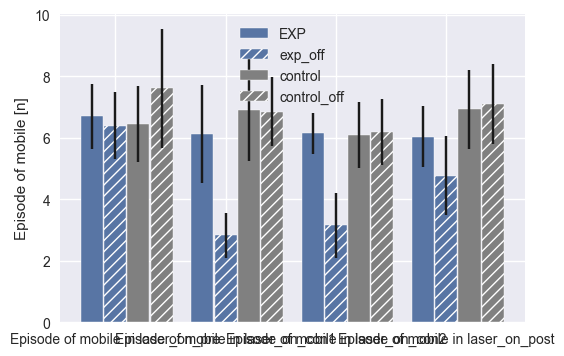

In [88]:
#  Graph
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(6,4))
x = np.arange(4)
width = 0.2
ax.bar(x - (width + 0.01), exp_episode_of_mobile_mean_norm, width, color="#5875a4", yerr = exp_episode_of_mobile_sem_norm)
ax.bar(x, exp_episode_of_mobile_off_mean_norm, width, color="#5875a4", yerr = exp_episode_of_mobile_off_sem_norm, hatch='///')
ax.bar(x+ (width + 0.01), control_episode_of_mobile_mean_norm, width, color='#808080', yerr = control_episode_of_mobile_sem_norm)
ax.bar(x + 2*(width + 0.01), control_episode_of_mobile_off_mean_norm, width, color='#808080', yerr = control_episode_of_mobile_off_sem_norm, hatch='///')

plt.xticks(x, columns_of_feature)
ax.set_ylabel("Episode of mobile [n]")
ax.legend(["EXP", "exp_off", "control", "control_off"])
save_fig_to = b"C:/Users/gniew/Desktop/PRACA/doktorat/behawior/CPP_A/Episode_of_mmobile_norm_off.svg"
plt.savefig(save_fig_to)
plt.show()

In [90]:
for i in control_episode_of_mobile_off_norm:
    print("KK")
    for j in i:
        print(j)

KK
13.664921465968586
17.142857142857142
3.9919354838709675
5.878962536023055
3.1132075471698113
10.387243735763098
2.618181818181818
4.046511627906977
KK
13.414634146341463
5.960264900662252
5.858585858585859
7.5365141187926
7.678100263852243
7.101449275362318
2.185430463576159
5.0078740157480315
KK
12.285714285714286
6.096866096866097
4.67966573816156
7.403598971722365
6.485013623978202
6.416510318949343
1.7365269461077844
4.3968432919954905
KK
13.553719008264462
7.54601226993865
6.315789473684211
8.339768339768339
8.037383177570094
8.502024291497976
1.530054644808743
2.9217391304347826


#### CPP Entrance to laser_on

In [48]:
columns_of_feature =  [x for x in column_list if "Entrance to laser_on" in x]
columns_of_feature_off =  [x for x in column_list if "Entrance to laser_off" in x]

In [49]:
exp_conteiner = [df.loc[df["grupa"] == "e", x].tolist() for x in columns_of_feature]
exp_conteiner_off = [df.loc[df["grupa"] == "e", x].tolist() for x in columns_of_feature_off]

exp_entrance_pre, exp_entrance_con1, exp_entrance_con2, exp_entrance_post = exp_conteiner[0], exp_conteiner[1], exp_conteiner[2], exp_conteiner[3]
exp_entrance_off_pre, exp_entrance_off_con1, exp_entrance_off_con2, exp_entrance_off_post = exp_conteiner_off[0], exp_conteiner_off[1], exp_conteiner_off[2], exp_conteiner_off[3]

control_conteiner = [df.loc[df["grupa"] == "c", x].tolist() for x in columns_of_feature]
control_conteiner_off = [df.loc[df["grupa"] == "c", x].tolist() for x in columns_of_feature_off]

control_entrance_pre, control_entrance_con1, control_entrance_con2, control_entrance_post = control_conteiner[0], control_conteiner[1], control_conteiner[2], control_conteiner[3]
control_entrance_off_pre, control_entrace_off_con1, control_entrance_off_con2, control_entrance_off_post = control_conteiner_off[0], control_conteiner_off[1], control_conteiner_off[2], control_conteiner_off[3]


In [62]:
# pre test
pt.mwu(exp_entrance_pre, control_entrance_pre, alternative='two-sided')
#pt.mwu(exp_entrance_pre, exp_entrance_off_pre, alternative='two-sided')
#pt.mwu(control_entrance_pre, control_entrance_off_pre, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,30.0,two-sided,0.873716,0.0625,0.46875


In [61]:
median(control_entrance_pre)

12.0

In [51]:
# con1 
pt.mwu(exp_entrance_con1, control_entrance_con1, alternative='two-sided')
#pt.mwu(exp_entrance_con1, exp_entrance_off_con1, alternative='two-sided')
#pt.mwu(control_entrace_off_con1, control_entrance_con1, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,7.5,two-sided,0.01129,0.765625,0.117188


In [52]:
# con2
pt.mwu(exp_entrance_con2, control_entrance_con2, alternative='two-sided')
#pt.mwu(exp_entrance_con2, exp_entrance_off_con2, alternative='two-sided')
#pt.mwu(control_entrance_off_con2, control_entrance_con2, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,11.5,two-sided,0.034476,0.640625,0.179688


In [53]:
# post test 
pt.mwu(exp_entrance_post, control_entrance_post, alternative='two-sided')
pt.mwu(exp_entrance_post, exp_entrance_off_post, alternative='two-sided')
pt.mwu(control_entrance_post, control_entrance_off_post, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,35.0,two-sided,0.792298,-0.09375,0.546875


In [54]:
for i in control_entrance_post:
    print(i)

24
16
12
15
11
10
7
6


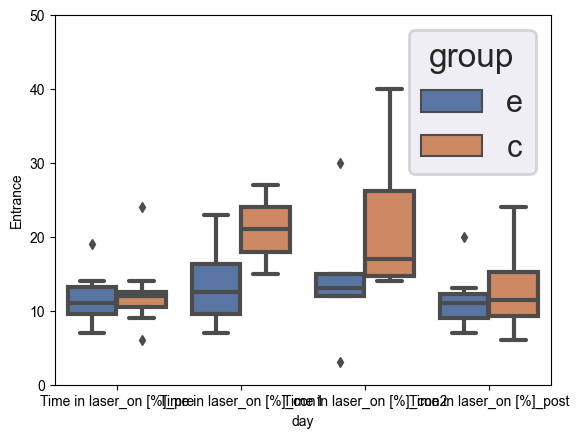

In [55]:
#Graph
flat_list_exp_entrance = list(np.concatenate(exp_conteiner).flat)
flat_list_control_entrance = list(np.concatenate(control_conteiner).flat)
entrance_feature = flat_list_exp_entrance + flat_list_control_entrance
dv_anova["Entrance"] = entrance_feature
fig, ax = plt.subplots()
sns.set_theme(context='poster')
sns.boxplot(data = dv_anova,y= "Entrance", x = "day", hue = "group", ax=ax)
ax.set_ylim(0, 50)
save_fig_to = "C:/Users/gniew/Desktop/PRACA/doktorat/behawior/CPP_A/ Entrance to laser_on.svg"
plt.savefig(save_fig_to)
plt.show()

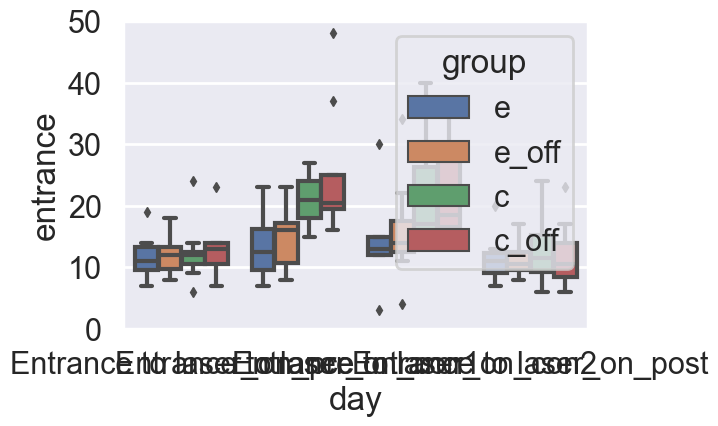

In [56]:
#Graph
flat_list_exp_entrance = list(np.concatenate(exp_conteiner).flat)
flat_list_control_entrance = list(np.concatenate(control_conteiner).flat)

flat_list_exp_entrance_off = list(np.concatenate(exp_conteiner_off).flat)
flat_list_control_entrance_off = list(np.concatenate(control_conteiner_off).flat)

entrance_feature = flat_list_exp_entrance + flat_list_exp_entrance_off  + flat_list_control_entrance + flat_list_control_entrance_off


day_feature = list(np.repeat(columns_of_feature, 8))
day_feature = day_feature + day_feature + day_feature + day_feature 

group_feature = list(np.repeat(["e", "e_off"], 32)) + list(np.repeat(["c", "c_off"], 32))


dv_anova_v2 = pd.DataFrame(columns = ["time", "group", "day", "subject"])
dv_anova_v2["entrance"] = entrance_feature
dv_anova_v2["group"] = group_feature
dv_anova_v2["day"] = day_feature

fig, ax = plt.subplots(figsize=(6,4))
sns.set_theme(context='poster')
ax = sns.boxplot(data = dv_anova_v2,y= "entrance", x = "day", hue = "group" )
ax.set_ylim(0, 50)
save_fig_to = "C:/Users/gniew/Desktop/PRACA/doktorat/behawior/CPP_A/Entrance to laser_on_off.svg"
plt.savefig(save_fig_to)
#plt.show()


